In [1]:
# 그래프 그리기 전에 데이터 불러오기

import os
import pandas as pd
import numpy as np
import re

In [59]:
pl_s = []
period_s = []
rev_s = []

for file in os.listdir('./SK텔레콤'):
    if '연결 손익계산서' in file:
        pl_s.append(file) 
        
        period = re.findall(r'{}(.*?){}'.format('보고서 \(', '\)'), file)
        period_s.append(period[0])

for file in pl_s:
    
    df = pd.read_csv('./SK텔레콤/{}'.format(file), encoding = 'euc-kr')
    df1 = df.apply(lambda x : x.str.contains('매출액'), axis = 1)
    
    if df1.sum().sum() == 1:
        
        col = df1.sum(axis = 0).values.argmax()
        row = df1.sum(axis = 1).values.argmax()
        rev = df.iloc[row, col+1]
        rev_s.append(rev)

rev_data = dict(zip(period_s,rev_s))
rev_data

{'2018.06': '4154324',
 '2019.06': '4437029',
 '2020.06': '4602813',
 '2018.09': '4186392',
 '2019.03': '4334906',
 '2019.09': '4561213',
 '2020.03': '4450396',
 '2020.09': '4730842',
 '2018.12': '16873960',
 '2019.12': '17743702'}

In [7]:
df0.head()

,Unnamed: 0,(단위 : 백만원),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,,제 36 기,제 35 기,제 34 기
1,NaN,영업수익,17743702,16873960,17520013
2,NaN,매출액,17743702,16873960,17520013
3,NaN,영업비용,16633722,15672200,15983387
4,NaN,종업원급여,2822673,2288655,1966156


In [8]:
df_boolean = df0 == '매출액'
col = df_boolean.sum(axis = 0).values.argmax()
row = df_boolean.sum(axis = 1).values.argmax()


C:\Users\allma\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [10]:
df0.iloc[2,1]

'매출액'

In [12]:
df['(단위 : 백만원)'].str.contains('매출액').head()

0    False
1    False
2     True
3    False
4    False
Name: (단위 : 백만원), dtype: bool

In [12]:
df111 = df.apply(lambda x : x.str.contains('매출액'), axis = 1)

In [39]:

col111 = df111.sum(axis = 0).values.argmax()
row111 = df111.sum(axis = 1).values.argmax()

In [40]:
col111

1

In [29]:
df111.apply(pd.value_counts)

,Unnamed: 0,(단위 : 백만원),Unnamed: 1,Unnamed: 2,Unnamed: 3
False,NaN,27,28.0,28.0,28.0
True,NaN,1,NaN,NaN,NaN


In [58]:
df111.sum().sum()

1.0

In [34]:
# matplot으로 그래프 그리기

import matplotlib.pyplot as plt

In [35]:
x = period_s
y = rev_s

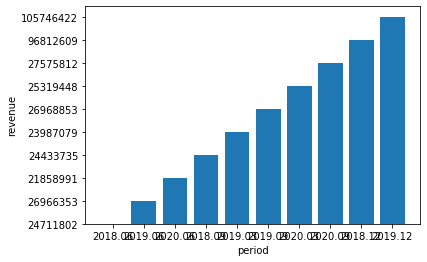

In [36]:
plt.bar(x, y)
plt.xlabel('period')
plt.ylabel('revenue')
plt.show()

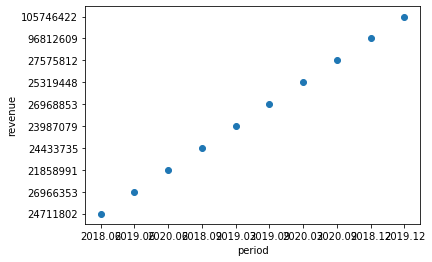

In [37]:
plt.scatter(x, y)
plt.xlabel('period')
plt.ylabel('revenue')
plt.show()

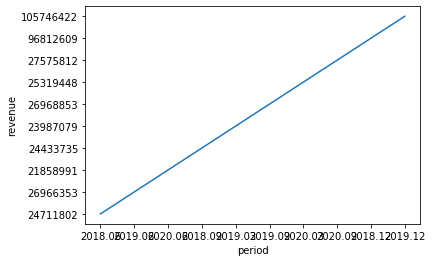

In [38]:
plt.plot(x, y)
plt.xlabel('period')
plt.ylabel('revenue')
plt.show()

In [40]:
# 문제점: 분기 순서 뒤죽박죽이고, 그래서 이걸 정렬시켜줄 필요

period_ss = list(map(float, period_s))
rev_ss = list(map(int, rev_s))
print(period_ss)
print(rev_ss)

[2018.06, 2019.06, 2020.06, 2018.09, 2019.03, 2019.09, 2020.03, 2020.09, 2018.12, 2019.12]
[24711802, 26966353, 21858991, 24433735, 23987079, 26968853, 25319448, 27575812, 96812609, 105746422]


In [42]:
rev_table = dict(zip(period_ss, rev_ss))
rev_table

{2018.06: 24711802,
 2019.06: 26966353,
 2020.06: 21858991,
 2018.09: 24433735,
 2019.03: 23987079,
 2019.09: 26968853,
 2020.03: 25319448,
 2020.09: 27575812,
 2018.12: 96812609,
 2019.12: 105746422}

In [53]:
rev_table_sort = sorted(rev_table.items())
rev_table_sort

[(2018.06, 24711802),
 (2018.09, 24433735),
 (2018.12, 96812609),
 (2019.03, 23987079),
 (2019.06, 26966353),
 (2019.09, 26968853),
 (2019.12, 105746422),
 (2020.03, 25319448),
 (2020.06, 21858991),
 (2020.09, 27575812)]

In [59]:
type(rev_table_sort[1])

tuple

In [83]:
rev_table_sort[1][0]

2018.09

In [84]:
len(rev_table_sort)

10

In [87]:
# sorted를 하니깐 tuple 형태여서 이걸 어떻게 다뤄야 할 지 모르겠음
# 그래서 다시 sorted 후 새로운 list를 만들어줌

period_sss = []
rev_sss = []

for i in range(len(rev_table_sort)):
    period_sss_i = rev_table_sort[i][0]
    rev_sss_i = rev_table_sort[i][1]
    
    period_sss.append(str(period_sss_i))
    rev_sss.append(rev_sss_i)
    
dict(zip(period_sss, rev_sss))

{'2018.06': 24711802,
 '2018.09': 24433735,
 '2018.12': 96812609,
 '2019.03': 23987079,
 '2019.06': 26966353,
 '2019.09': 26968853,
 '2019.12': 105746422,
 '2020.03': 25319448,
 '2020.06': 21858991,
 '2020.09': 27575812}

In [88]:
x1 = period_sss
y1 = rev_sss

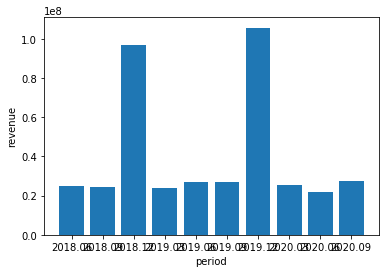

In [90]:
plt.bar(x1, y1)
plt.xlabel('period')
plt.ylabel('revenue')
plt.show()

In [91]:
# 완성!

In [15]:
# 소수점을 찍어주면 int가 아니라 float type이 됨

2018.06
type(2018.06)

float

In [22]:
floatlist = [1.01, 1.02, 1.09, 1.08]

In [27]:
floatlist.sort(reverse = False)
floatlist

[1.01, 1.02, 1.08, 1.09]